Importing library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.metrics import confusion_matrix


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


Main data

In [2]:
df = pd.read_csv('CleanedData.csv')

In [3]:
df.City.unique()

array(['Mumbai', 'Thane', 'Pune', 'Delhi NCR', nan, 'Bangalore', 'Patna',
       'Indore', 'Vijayawada', 'Surat', 'Chennai', 'Hyderabad', 'Guntur',
       'Guwahati', 'Aizawl', 'Imphal', 'Dimapur', 'Visakhapatnam',
       'Amritsar', 'LUDHIANA', 'KANPUR', 'Gorakhpur', 'Vizag', 'BHOPAL',
       'Patti', 'MADURAI', 'BILASPUR', 'BELAGAVI', 'Raigarh'],
      dtype=object)

Data Preprocesing 

In [4]:
df = df.drop(['Reservation date','Clinic Code','Token #','Token title','Phone Number','S. No','Clinic Name','Month','Year','Date','HIV Status','Chain Name','Private/NGO/Government','Home Collection/Walk in','Paid/Free','STI-Screen','Arrived','Gender','Sr no','Latitude','Longitude'], axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7552 entries, 0 to 7551
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               7552 non-null   object
 1   age_group          7552 non-null   object
 2   Age                7552 non-null   int64 
 3   Screening          7552 non-null   object
 4   is_msm             7552 non-null   int64 
 5   is_sw              7552 non-null   int64 
 6   is_pwid            7552 non-null   int64 
 7   is_tg              7552 non-null   int64 
 8   test_recent        7552 non-null   int64 
 9   KP Labels          7552 non-null   object
 10  Last HIV Test      7552 non-null   object
 11  Men                7552 non-null   int64 
 12  Women              7552 non-null   int64 
 13  Transgender        7552 non-null   int64 
 14  No_condom          7552 non-null   int64 
 15  STI_TB             7552 non-null   int64 
 16  Sex_work           7552 non-null   int64 


In [6]:
df.rename(columns={'mix':'Id',},inplace=True)

In [7]:
le = preprocessing.LabelEncoder()
df['Id'] = le.fit_transform(df['Id'])
df['KP Labels']=le.fit_transform(df['KP Labels'])

In [8]:
df = df.drop(['City','Age','Last HIV Test','age_group'], axis = 1)

In [9]:
#df.info()

In [10]:
test = df.loc[df['Screening'] == 'Not arrived']

In [11]:
train = df.loc[df['Screening'] != 'Not arrived']

In [12]:
print(test.shape,train.shape)

(3748, 21) (3804, 21)


In [13]:
pd.options.display.float_format = '{:,.3f}'.format

In [14]:
train = train.drop(['is_msm','is_sw','is_pwid','KP Labels','Women','test_recent'],axis = 1)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3804 entries, 0 to 7538
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               3804 non-null   object
 1   Screening          3804 non-null   object
 2   is_tg              3804 non-null   int64 
 3   Men                3804 non-null   int64 
 4   Transgender        3804 non-null   int64 
 5   No_condom          3804 non-null   int64 
 6   STI_TB             3804 non-null   int64 
 7   Sex_work           3804 non-null   int64 
 8   Injecting          3804 non-null   int64 
 9   Non_consensual     3804 non-null   int64 
 10  Multiple_partners  3804 non-null   int64 
 11  Shared_syringe     3804 non-null   int64 
 12  Alcohol_drugs      3804 non-null   int64 
 13  High_fun           3804 non-null   int64 
 14  Id                 3804 non-null   int32 
dtypes: int32(1), int64(12), object(2)
memory usage: 460.6+ KB


In [16]:
train = train.drop(['is_tg','Injecting','Non_consensual','Shared_syringe'], axis = 1)

In [17]:
# train.corr()

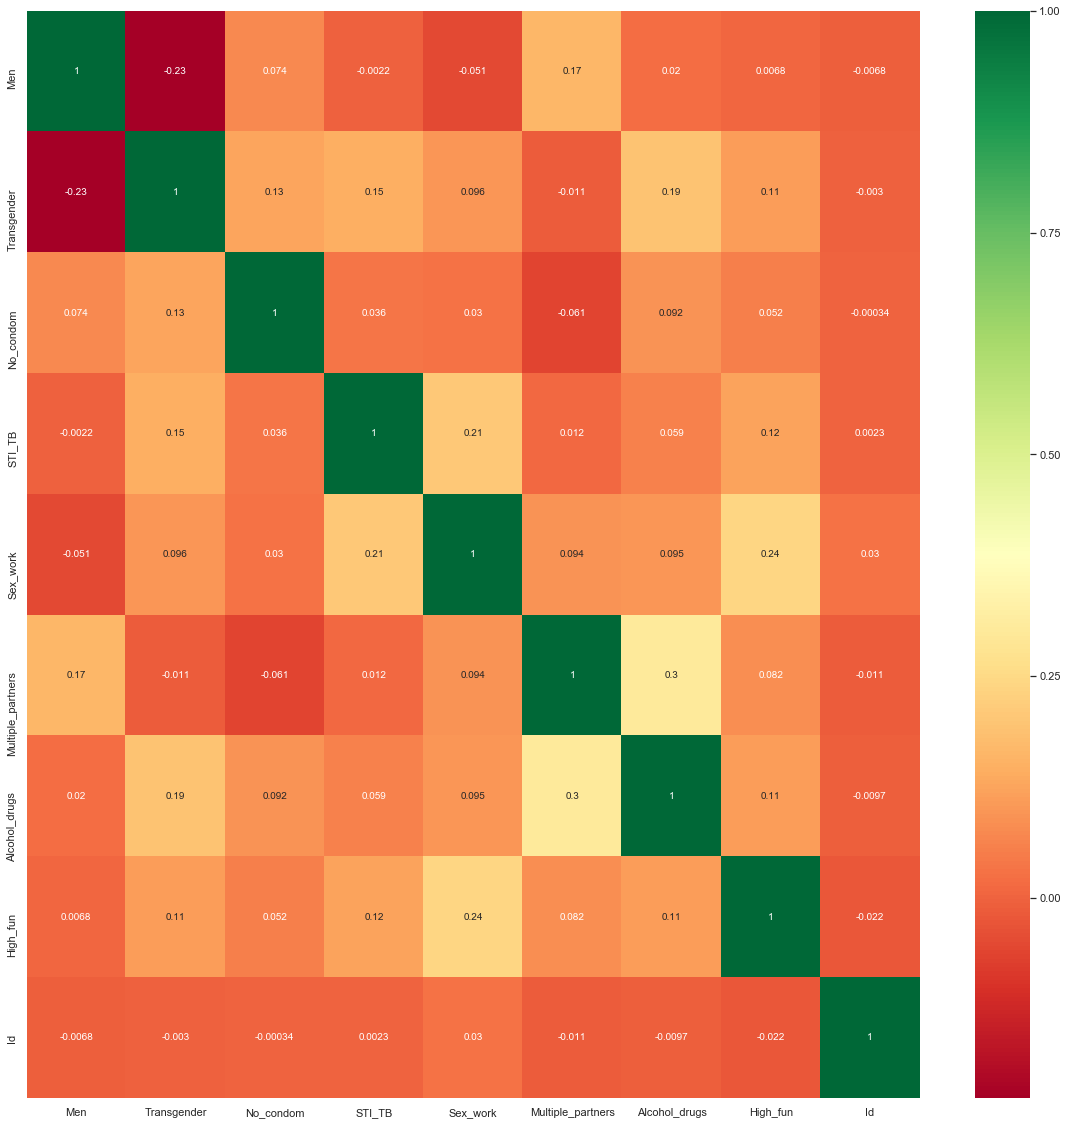

In [18]:
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [21]:
train.to_csv ('training_data.csv', index=None, header = True)

In [22]:
pos = train.loc[train['Screening']=='1']

In [23]:
train = train.loc[train['Screening'] == '0']
train = train.head(500)

In [24]:
train

,Name,Screening,Men,Transgender,No_condom,STI_TB,Sex_work,Multiple_partners,Alcohol_drugs,High_fun,Id
0,nayan,0,0,0,0,0,0,0,0,0,3473
7,vg,0,0,0,0,0,0,0,0,0,6678
10,shankar,0,0,0,0,0,0,0,0,0,5579
12,rohan,0,0,0,0,0,0,0,0,0,4856
13,ronak,0,1,0,1,0,0,0,0,0,4944
...,...,...,...,...,...,...,...,...,...,...,...
1653,rudra verma,0,1,0,1,0,0,0,0,0,4982
1654,anuj,0,1,0,1,0,0,1,0,0,894
1660,sidhart,0,1,0,0,0,0,1,0,0,5854
1662,maniamala,0,1,0,1,0,1,1,1,0,2964


In [25]:
train = [pos,train]
train = pd.concat(train)

In [26]:
x = train.drop(['Id','Screening','Name'],axis = 1)
y = train.Screening

In [27]:
train.isnull().values.any()

False

In [28]:
columns = train.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Screening"]]
# Store the variable we are predicting 
target = "Screening"
# Define a random state 
state = np.random.RandomState(42)
X = train[columns]
Y = train[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(767, 10)
(767,)


Text(0, 0.5, 'Frequency')

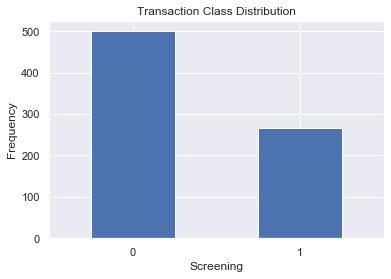

In [29]:
count_classes = pd.value_counts(train['Screening'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

#plt.xticks(range(2), LABELS)

plt.xlabel("Screening")

plt.ylabel("Frequency")

In [30]:
Positive = train[train['Screening']==1]

Negative = train[train['Screening']==0]

print(Positive.shape,Negative.shape)

(0, 11) (0, 11)


In [31]:
df = train

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 48 to 1663
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               767 non-null    object
 1   Screening          767 non-null    object
 2   Men                767 non-null    int64 
 3   Transgender        767 non-null    int64 
 4   No_condom          767 non-null    int64 
 5   STI_TB             767 non-null    int64 
 6   Sex_work           767 non-null    int64 
 7   Multiple_partners  767 non-null    int64 
 8   Alcohol_drugs      767 non-null    int64 
 9   High_fun           767 non-null    int64 
 10  Id                 767 non-null    int32 
dtypes: int32(1), int64(8), object(2)
memory usage: 68.9+ KB


data in to model

In [33]:
x = df.drop(['Screening','Id','Name'], axis = 1)
y = df.Screening
# sc = StandardScaler()
# x = sc.fit_transform(x)

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.1,  random_state = 42)

In [35]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model = LogisticRegression(random_state=0)

In [36]:
model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# model.fit(x_train,y_train)

In [38]:
pre = model.predict(x_test)
pre

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
      dtype=object)

In [39]:
accuracy = model.score(x_test,y_test)
accuracy

0.6883116883116883

In [40]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
predicted = cross_val_score(model, x, y, cv=17)
# metrics.accuracy_score(y, predicted)
predicted
# accuracy = metrics.accuracy_score(y, predicted)
# accuracy

array([0.67391304, 0.65217391, 0.77777778, 0.66666667, 0.62222222,
       0.64444444, 0.64444444, 0.64444444, 0.64444444, 0.68888889,
       0.66666667, 0.62222222, 0.75555556, 0.71111111, 0.73333333,
       0.71111111, 0.68888889])

In [41]:
cm = confusion_matrix(y_test,pre)

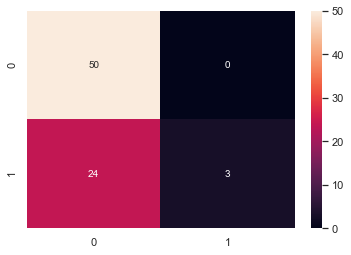

In [42]:
sns.heatmap(cm, annot=True)

In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pre)

0.3116883116883117

In [44]:
test = test.drop(['is_msm','is_sw','is_pwid','KP Labels','Women','test_recent'],axis = 1)

In [45]:
test = test.drop(['is_tg','Injecting','Non_consensual','Shared_syringe'], axis = 1)

Data for testing

In [46]:
test.to_csv ('testing_data.csv', index=None, header = True)

In [47]:
test = test.drop(['Id','Screening','Name'], axis = 1)

In [48]:
pre = model.predict(test)
pre

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [49]:
pre_prob = model.predict_proba(test)
pre_prob

array([[0.76611876, 0.23388124],
       [0.51732212, 0.48267788],
       [0.75306872, 0.24693128],
       ...,
       [0.61356992, 0.38643008],
       [0.60249698, 0.39750302],
       [0.61356992, 0.38643008]])

In [50]:
test = pd.read_csv('testing_data.csv')

In [51]:
test['pre'] = pre
test['prob_0'] = pre_prob[:,0] 
test['prob_1'] = pre_prob[:,1]

In [52]:
test

,Name,Screening,Men,Transgender,No_condom,STI_TB,Sex_work,Multiple_partners,Alcohol_drugs,High_fun,Id,pre,prob_0,prob_1
0,saurabh dixit,Not arrived,1,0,1,0,1,1,1,0,5450,0,0.766,0.234
1,arshad,Not arrived,1,0,1,0,0,0,0,0,996,0,0.517,0.483
2,sanish,Not arrived,1,0,0,0,0,0,0,0,5322,0,0.753,0.247
3,mr dasgupta,Not arrived,1,0,1,0,0,1,0,0,3274,0,0.614,0.386
4,jithin,Not arrived,1,0,1,0,0,1,1,0,2400,0,0.687,0.313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,sathish,Not arrived,1,0,1,0,0,1,0,0,5425,0,0.614,0.386
3744,anil,Not arrived,1,0,1,0,0,0,0,0,748,0,0.517,0.483
3745,rohit jaiswal,Not arrived,1,0,1,0,0,1,0,0,4871,0,0.614,0.386
3746,yash,Not arrived,1,0,1,0,0,1,0,1,7060,0,0.602,0.398


In [53]:
test.to_csv ('prediction.csv', index=None, header = True)

In [54]:
pos = test.loc[test['pre'] == '1']
pos

,Name,Screening,Men,Transgender,No_condom,STI_TB,Sex_work,Multiple_partners,Alcohol_drugs,High_fun,Id,pre,prob_0,prob_1
29,vicky,Not arrived,0,1,1,0,0,0,0,0,6699,1,0.334,0.666
31,kamar,Not arrived,1,1,0,0,0,0,0,0,2508,1,0.306,0.694
42,parth patel,Not arrived,1,1,1,0,0,0,0,0,3774,1,0.134,0.866
87,vishnu keerti,Not arrived,1,1,1,1,0,1,1,0,6967,1,0.291,0.709
102,mandeep,Not arrived,1,1,1,0,0,0,1,0,2951,1,0.176,0.824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,divanshu gupta,Not arrived,1,1,1,0,0,0,0,0,1773,1,0.134,0.866
3723,jeevan,Not arrived,1,1,1,0,0,0,0,0,2372,1,0.134,0.866
3728,naresh,Not arrived,1,1,1,0,0,0,0,0,3408,1,0.134,0.866
3732,ramu,Not arrived,1,1,1,0,0,0,0,0,4593,1,0.134,0.866
